# Example for drawing regression results

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Specify the directory containing the regression results
result_dir = './Results_TSMMF/test_regression/'

In [3]:
'''
Moving average with padding is used to smooth the curve for better visualization
'''

def MA_pad(x, window=5):
    """
    Moving average with padding
    :param x: input array
    :param window: window size
    :return: moving average array
    """
    if len(x) == 0:
        return x
    if window == 0:
        return x
    if window == 1:
        return x
    if window > len(x):
        return np.ones(len(x)) * np.mean(x)
    pad = int(window / 2)
    x_pad = np.pad(x, (pad, pad), 'edge')
    return np.convolve(x_pad, np.ones(window) / window, mode='valid')

d:\anaconda3\envs\torch2\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\anaconda3\envs\torch2\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Successfully load 480 results.


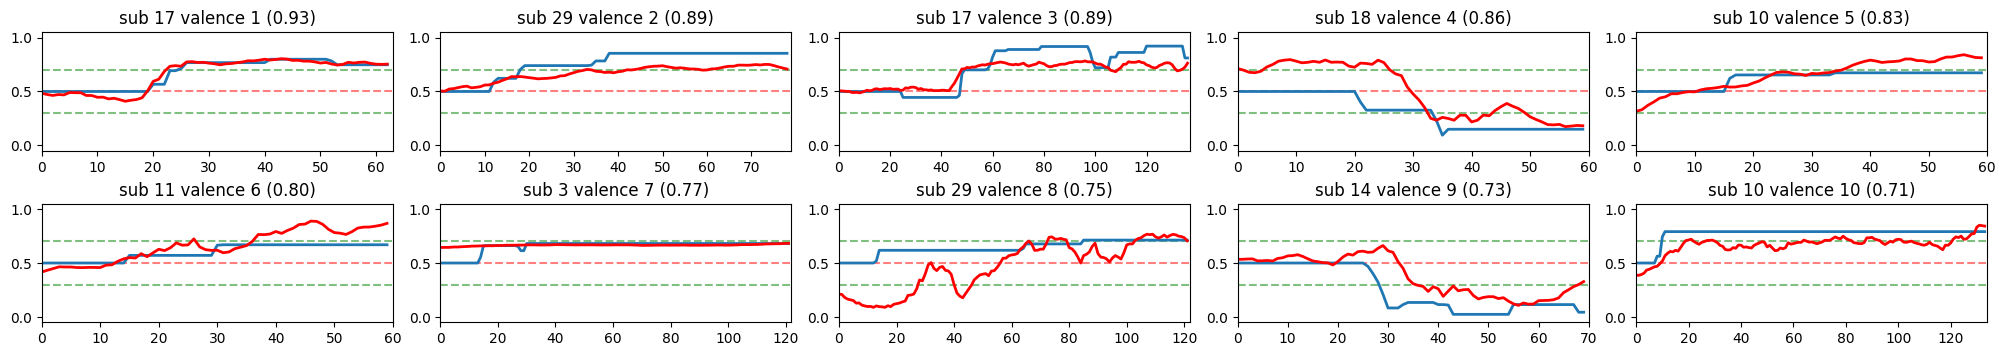

In [4]:
sub_list = os.listdir(result_dir)    

# Compute correlation for all subjects and valence dimensions
corr_all = {}
for si in sub_list:
    try:
        data = np.load(os.path.join(result_dir, si, 'output.npz'), allow_pickle=True)['arr_0'].item()
    except: 
        print(f'Error loading data for subject {si}, skipping.')
        continue
    
    for i in range(len(data['true'])):
        label_true = data['true'][i].squeeze()
        label_pred = data['pred'][i].squeeze()
        pear = np.corrcoef(label_true, label_pred)[0,1]
        if np.isnan(pear):
            pear = 0
        corr_all['sub_'+si+'_valence_'+str(i+1)] = pear
print('Successfully load', len(corr_all), 'results.')

# Sort by correlation values
corr_all = dict(sorted(corr_all.items(), key=lambda item: item[1], reverse=True))
# print(corr_all)

# Plot results for top 10 correlations
plt.figure(figsize=(20, 3.5))
i = 0
for ti in corr_all:
    si = ti.split('_')[1]
    vi = int(ti.split('_')[3]) - 1
    data_si = np.load(os.path.join(result_dir, si, 'output.npz'), allow_pickle=True)['arr_0'].item()
    label_true = data_si['true'][vi].squeeze()
    label_pred = data_si['pred'][vi].squeeze()
    plt.subplot(2,5,i+1)
    plt.ylim(-0.05,1.05)
    plt.hlines(0.5, 0, len(label_pred), colors='r', linestyles='dashed', alpha=0.5)
    plt.hlines([0.3,0.7], 0, len(label_true), colors='g', linestyles='dashed', alpha=0.5)
    plt.plot(label_true, label='true', linewidth=2)
    plt.plot(MA_pad(label_pred), label='pred', linewidth=2, color='r')
    plt.xlim(0, len(label_true))
    pear = np.corrcoef(label_true, label_pred)[0,1]
    plt.title(f'sub {si} valence {i+1} ({pear:.2f})')
    i += 1
    if i>=10:
        break
plt.tight_layout(pad=0.5)
# plt.savefig(f'./figure/output_reg_{si}.png', dpi=300)
plt.show()